In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline
# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'
import pandas as pd
# Import NumPy under the abbreviation 'np'
import numpy as np
# Libraries to aid in web scraping
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns;
#Notes for efficienccy:
#shift + tab when cursor is in arguments to bring up its documentation
#ex: pd.DataFrame(Shift+tab here)
#recall: Json == Dictionary
#to know functions of pandas:
#dir(pd)

In [2]:
# Getting the Cleaned Datasets
acquisC = pd.read_csv("datasets/startupsCleaned/acquisitionsCleaned.csv")
companiesCS = pd.read_csv("datasets/startupsCleaned/companiesCleanedAndScraped.csv", parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'time_before_first_fund'])
investsC = pd.read_csv("datasets/startupsCleaned/investmentsCleaned.csv")
roundsC = pd.read_csv("datasets/startupsCleaned/roundsCleaned.csv")
dfAllC = [acquisC, companiesCS, investsC, roundsC]
lstCsvNames = ["acquisitions", "companies", "investments", "rounds"]

In [3]:
# Getting important functions
def datasetsCols(dfList, datasetNames, pad=""):
    """
    Takes dataframes and returns a dataframe (df) with each column having a df's
    column names. The "pad" is to make sure all lists of columns have 
    the same length padded out with "pad"
    Example
    pad = "XX", datasetNames = ["cars", "planes"]
    dfList = [carsDF, planesDF]
    returned data frame:
            cars            planes
    0       numOfWheels     numOfWings
    1       manufacturer    manufacturer
    2       make            XX
    """
    cols = []
    maxArrayLen = 0
    for i, df in enumerate(dfList):
        cols.append(df.columns.tolist())
        maxArrayLen = max(maxArrayLen, len(cols[i]))
    
    dictCsvs = {}
    for i, df in enumerate(dfList):
        cols[i] += [pad] * (maxArrayLen - len(cols[i])) #padding the lists to make them have equal lengths 
        dictCsvs.update({datasetNames[i] : cols[i]})

    return pd.DataFrame(dictCsvs)

In [4]:
# Getting important functions (cont.)
def datasetsNulls(dfList, datasetNames, nullCol="nulls_", pad=""):
    """
    Use this when you want to display a column of column names,
    then a column of the null values, and repeat that for each dataset.
    Returns a dataframe
    """
    cols = []
    nulls = []
    maxArrayLen = 0
    for i, df in enumerate(dfList):
        cols.append(df.columns.tolist())
        nulls.append(df.isnull().sum().tolist())
        maxArrayLen = max(maxArrayLen, len(cols[i]))
    
    dictCsvs = {}
    for i, df in enumerate(dfList):
        cols[i] += [pad] * (maxArrayLen - len(cols[i])) #padding the lists to make them have equal lengths 
        nulls[i] += [None] *  (maxArrayLen - len(nulls[i]))
        dictCsvs[datasetNames[i]] = cols[i]
        dictCsvs[nullCol + str(i+1)] = nulls[i]
    
    return pd.DataFrame(dictCsvs)

## Question 1 (Farah)

#### Does the number of Employees affect the success of company?

In [5]:
companiesCS

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,2015-01-05,2015-01-05,1363 days 03:13:16.759422320,57,1,1.500000e+06
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,7.000000e+05,operating,USA,Delaware City,2,2014-09-04 00:00:00.000000000,2014-03-01,2014-10-14,-187 days +00:00:00,4,3,NaN
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3.406878e+06,operating,JPN,missing,1,2010-05-07 20:46:43.240577680,2014-01-30,2014-01-30,1363 days 03:13:16.759422320,18,10,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2.000000e+06,operating,CHN,Beijing,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19,443 days 00:00:00,0,5,NaN
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.000000e+00,operating,USA,Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665 days 00:00:00,67,10,5.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,/organization/pintail-technologies,Pintail Technologies,http://www.pintailtechnologies.com,Software,1.000000e+07,operating,USA,Richardson,2,2000-01-01 00:00:00.000000000,2005-03-08,2006-09-29,1893 days 00:00:00,0,1,2.000000e+06
16512,/organization/pinterest,Pinterest,https://pinterest.com,Curated Web|Social Bookmarking|Social Media,1.315500e+09,operating,USA,San Francisco,10,2009-01-01 00:00:00.000000000,2010-01-01,2015-06-01,365 days 00:00:00,6000,26,2.436989e+09
16513,/organization/pintex-pharmaceuticals,Pintex Pharmaceuticals,http://www.pintexpharm.com,Pharmaceuticals,7.250000e+06,acquired,USA,Watertown,1,2000-05-01 00:00:00.000000000,2002-12-24,2002-12-24,967 days 00:00:00,0,0,NaN
16514,/organization/pintics,Pintics,http://www.pintics.com,Curated Web,1.000000e+04,closed,USA,San Jose,1,2012-01-10 00:00:00.000000000,2012-05-18,2012-05-18,129 days 00:00:00,0,1,NaN


### Cleaning

As seen below, annual revenues has nulls in it so it will be dropped when this feature is needed.

In [6]:
companiesCS.isnull().sum()

company_permalink            0
company_name                 0
homepage_url                 0
company_category_list        0
funding_total_usd            0
status                       0
company_country_code         0
company_city                 0
funding_rounds               0
founded_at                   0
first_funding_at             0
last_funding_at              0
time_before_first_fund       0
employee_count               0
number_of_technologies       0
annual_rev                4986
dtype: int64

Let's see if the relationship between the number of employees is proportional with the suceess of the company in other words operating or not.
Unfortunately, we don't have details on employees' salaries but we have their number in each company. if it's directly proportional then the number of employees present an important asset to building a new company, while if it's directly proportional then it proves that employing many employees can be only a burden to kick off the company

In [7]:
operating_comps = companiesCS[companiesCS['status'] == 'operating']
operating_comps.sort_values(by=['employee_count'], ascending=False, inplace=True)
operating_comps

C:\Users\Farah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
16328,/organization/pickatale,Pickatale,http://itunes.apple.com/en/app/100+-interactiv...,Education|iPad|Kids|Language Learning,1000000.0,operating,USA,missing,1,2013-01-01 00:00:00.000000000,2013-01-01,2013-01-01,0 days 00:00:00,428000,12,3.783230e+11
5367,/organization/beme-2,Beme,https://itunes.apple.com/us/app/beme-share-vid...,Video,2000000.0,operating,USA,New York,1,2011-11-02 20:46:43.240577680,2015-07-28,2015-07-28,1363 days 03:13:16.759422320,428000,12,3.783230e+11
4715,/organization/b-famous-media-llc,"b*famous Media, LLC",https://itunes.apple.com/us/app/b*famous/id929...,Apps|Internet|Mobile Games,0.0,operating,USA,Boston,1,2010-09-17 20:46:43.240577680,2014-06-12,2014-06-12,1363 days 03:13:16.759422320,428000,12,3.783230e+11
10902,/organization/megajosh,MEGAJOSH,http://goo.gl/7vAvYj,Bitcoin|Classifieds|E-Commerce|Marketplaces|Mo...,0.0,operating,USA,Orlando,1,2015-01-01 00:00:00.000000000,2015-06-01,2015-06-01,151 days 00:00:00,281000,147,2.580000e+08
9671,/organization/maaish-inc,Maaish Inc,https://drive.google.com/file/d/0B1Nzn7sbX92fN...,missing,50000.0,operating,USA,missing,1,2015-07-01 00:00:00.000000000,2015-07-15,2015-07-15,14 days 00:00:00,281000,147,2.580000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,/organization/native-4,Now Native,http://nownative.com,Advertising,0.0,operating,GBR,London,1,2011-03-10 20:46:43.240577680,2014-12-03,2014-12-03,1363 days 03:13:16.759422320,0,3,NaN
13558,/organization/native-tap,Native Tap,http://nativetap.io/,Apps,100000.0,operating,USA,San Francisco,1,2011-02-06 20:46:43.240577680,2014-11-01,2014-11-01,1363 days 03:13:16.759422320,0,33,NaN
8630,/organization/cbca,CBCA,http://www.cbca.com/,Employer Benefits Programs|Health and Insuranc...,30000000.0,operating,USA,Oakland,1,1998-08-07 20:46:43.240577680,2002-05-02,2002-05-02,1363 days 03:13:16.759422320,0,1,1.750000e+08
2282,/organization/alphacare-holdings,AlphaCare Holdings,http://alphacare.com,Biotechnology,17415364.0,operating,USA,Brooklyn,2,2012-01-01 00:00:00.000000000,2013-08-14,2014-01-14,591 days 00:00:00,0,6,7.000000e+06


In [8]:
closed_comps = companiesCS[companiesCS['status'] == 'closed']
closed_comps.sort_values(by=['employee_count'], ascending=False, inplace=True)
closed_comps

C:\Users\Farah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
15276,/organization/omnino-llp,Omnino LLP,https://www.linkedin.com/company/omnino-llp,missing,0.0,closed,USA,missing,1,2008-01-01 00:00:00.000000000,2008-02-15,2008-02-15,45 days 00:00:00,25000,36,1.030000e+10
8407,/organization/carrot-rocket-ltd,Carrot Rocket Ltd,https://www.linkedin.com/company/carrot-rocket...,Apps|Entertainment|Internet,450000.0,closed,GBR,London,1,2015-03-13 00:00:00.000000000,2015-02-02,2015-02-02,-39 days +00:00:00,25000,36,1.030000e+10
9447,/organization/lululemon-athletica,lululemon athletica,http://www.lululemon.com,Fitness|Health and Wellness|Online Shopping,93000000.0,closed,CAN,Vancouver,1,1998-01-01 00:00:00.000000000,2005-12-14,2005-12-14,2904 days 00:00:00,17000,25,5.857053e+09
12059,/organization/mobintent,mobintent,http://www.businessinsider.com/mobintent-dies-...,Advertising|Finance,0.0,closed,USA,New York,1,2010-08-01 00:00:00.000000000,2011-07-01,2011-07-01,334 days 00:00:00,17000,42,1.100000e+08
15711,/organization/openreach-2,OpenReach,http://www.openreach.com/,Networking,7000000.0,closed,USA,Woburn,1,2000-05-06 20:46:43.240577680,2004-01-30,2004-01-30,1363 days 03:13:16.759422320,14000,14,6.558020e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,/organization/buyosphere,Buyosphere,http://buyosphere.com,E-Commerce|Fashion|Search|Shopping|Social Comm...,325000.0,closed,CAN,Montréal,1,2010-01-01 00:00:00.000000000,2012-01-05,2012-01-05,734 days 00:00:00,0,4,1.400000e+06
7640,/organization/buyplaywin,BuyPlayWin,http://buyplaywin.com,Curated Web|Finance,0.0,closed,USA,missing,1,2004-08-06 20:46:43.240577680,2008-05-01,2008-05-01,1363 days 03:13:16.759422320,0,3,NaN
7646,/organization/buysimple,BuySimple,http://www.buysimple.com,E-Commerce,700000.0,closed,USA,Palo Alto,1,2011-01-01 00:00:00.000000000,2011-05-31,2011-05-31,150 days 00:00:00,0,6,NaN
7647,/organization/buystand,BUYSTAND,http://buystand.com,Big Data|E-Commerce|Marketplaces,450000.0,closed,USA,Durham,1,2011-11-01 00:00:00.000000000,2012-12-17,2012-12-17,412 days 00:00:00,0,3,NaN


In [9]:
acquired_comps = companiesCS[companiesCS['status'] == 'acquired']
acquired_comps.sort_values(by=['employee_count'], ascending=False, inplace=True)
acquired_comps

C:\Users\Farah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
7466,/organization/buildforge,BuildForge,http://ibm.com/awdtools/buildforge,Software,6000000.0,acquired,USA,Austin,1,2001-01-01 00:00:00.000000000,2005-09-12,2005-09-12,1715 days 00:00:00,528000,47,5.735000e+10
1245,/organization/admob,AdMob,http://www.google.com/admob,Advertising|Mobile,46800000.0,acquired,USA,Mountain View,4,2006-12-01 00:00:00.000000000,2006-09-01,2009-01-29,-91 days +00:00:00,281000,147,2.580000e+08
13805,/organization/neopath-networks,NeoPath Networks,http://cisco.com,Enterprise Software,29000000.0,acquired,USA,Mountain View,3,2002-01-01 00:00:00.000000000,2004-03-08,2006-05-22,797 days 00:00:00,99000,54,4.920000e+10
9706,/organization/macromedia,Macromedia,http://www.adobe.com,Software,44000000.0,acquired,USA,San Francisco,1,1992-01-01 00:00:00.000000000,1999-12-03,1999-12-03,2893 days 00:00:00,31000,72,1.578500e+10
15088,/organization/office-depot,Office Depot,http://officedepot.com,E-Commerce,0.0,acquired,USA,Boca Raton,1,1986-01-01 00:00:00.000000000,1989-06-01,1989-06-01,1247 days 00:00:00,31000,22,8.465000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,/organization/liquidtalk,LiquidTalk,http://www.liquidtalk.com,Enterprise Software,2430000.0,acquired,USA,Chicago,1,2006-01-01 00:00:00.000000000,2007-03-05,2007-03-05,428 days 00:00:00,0,1,2.400000e+06
8833,/organization/live-matrix,Live Matrix,http://www.livematrix.com,Curated Web|Online Scheduling|Video,0.0,acquired,USA,Los Angeles,1,2009-01-01 00:00:00.000000000,2009-01-01,2009-01-01,0 days 00:00:00,0,2,2.400000e+06
8835,/organization/live-on-the-go,Live On The Go,http://www.liveonthego.com,Curated Web|Restaurants,60000.0,acquired,USA,Anaheim,1,2005-09-03 20:46:43.240577680,2009-05-29,2009-05-29,1363 days 03:13:16.759422320,0,1,1.750000e+07
8929,/organization/livio-radio,Livio Radio,http://livioradio.com,Apps|Electronics|Hardware + Software|Music,5796518.0,acquired,USA,Ferndale,4,2008-01-01 00:00:00.000000000,2010-06-17,2013-07-18,898 days 00:00:00,0,5,2.400000e+06


In [10]:
ipo_comps = companiesCS[companiesCS['status'] == 'ipo']
ipo_comps.sort_values(by=['employee_count'], ascending=False, inplace=True)
ipo_comps

C:\Users\Farah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
2438,/organization/amazon,Amazon,http://amazon.com,Consumer Goods|Crowdsourcing|Delivery|E-Commer...,8.000000e+06,ipo,USA,Seattle,1,1994-07-05 00:00:00.000000000,1995-07-01,1995-07-01,361 days 00:00:00,1057000,35,4.698220e+11
591,/organization/abbott,Abbott Labs,http://www.abbott.com,Biotechnology|Health and Wellness|Medical|Vent...,6.790000e+06,ipo,USA,Des Plaines,2,1991-01-01 00:00:00.000000000,2009-03-16,2011-03-15,6649 days 00:00:00,166000,22,4.307500e+10
587,/organization/abb,ABB,http://www.abb.com,Automotive|Clean Technology|Energy|Technology,2.700000e+06,ipo,CHE,Zürich,1,1988-01-01 00:00:00.000000000,2013-09-23,2013-09-23,9397 days 00:00:00,125000,55,2.856000e+10
9078,/organization/lockheed-martin,Lockheed Martin,http://www.lockheedmartin.com,Design|Security,2.740000e+07,ipo,USA,Bethesda,2,1995-03-01 00:00:00.000000000,2009-07-06,2010-11-22,5241 days 00:00:00,111000,16,6.704400e+10
1272,/organization/adp,ADP (Automatic Data Processing),http://www.adp.com,Business Services|Consulting|Outsourcing,2.000000e+06,ipo,USA,Roseland,1,1949-01-01 00:00:00.000000000,2005-12-30,2005-12-30,20817 days 00:00:00,91000,34,1.569670e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,/organization/alexion-pharmaceuticals,Alexion Pharmaceuticals,http://www.alexionpharma.com,Biotechnology|Health and Wellness|Medical,3.132281e+04,ipo,USA,Cheshire,1,1992-01-01 00:00:00.000000000,2015-04-02,2015-04-02,8492 days 00:00:00,0,15,NaN
8185,/organization/carbylan-biosurgery,Carbylan Therapeutics,http://www.carbylan.com,Health Care,3.500000e+07,ipo,USA,Palo Alto,4,2005-01-01 00:00:00.000000000,2007-11-26,2015-03-06,1059 days 00:00:00,0,14,NaN
5857,/organization/bioheart,Bioheart,http://www.bioheartinc.com,Biotechnology,9.465200e+05,ipo,USA,Sunrise,5,1999-01-01 00:00:00.000000000,2001-06-12,2013-06-05,893 days 00:00:00,0,10,NaN
7721,/organization/c-bridge-internet-solutions,C-Bridge Internet Solutions,http://www.c-bridge.com/about_us.htm,Consulting,3.747923e+08,ipo,USA,Cambridge,3,1996-01-01 00:00:00.000000000,1999-01-01,2000-01-01,1096 days 00:00:00,0,0,7.000000e+06


In [11]:
operating_comps['employee_count'].value_counts(ascending=False)

0       2752
2        839
3        632
1        518
4        448
        ... 
7500       1
7700       1
8000       1
9100       1
3500       1
Name: employee_count, Length: 276, dtype: int64

In [12]:
closed_comps['employee_count'].value_counts(ascending=False)

0      719
2       74
1       67
3       61
10      52
      ... 
230      1
240      1
250      1
380      1
71       1
Name: employee_count, Length: 137, dtype: int64

In [13]:
acquired_comps['employee_count'].value_counts(ascending=False)

0      381
2       78
10      52
3       45
1       43
      ... 
780      1
790      1
860      1
900      1
93       1
Name: employee_count, Length: 182, dtype: int64

In [14]:
ipo_comps['employee_count'].value_counts(ascending=False)

0          21
5          15
2          14
150         9
9           8
           ..
3300        1
3200        1
3100        1
180         1
1057000     1
Name: employee_count, Length: 188, dtype: int64

We can consider the companies with 0 employees that the founder did not employ anyone and we will see later the impact of this decision on the company.
To see how impactful the number of employees on the success of a company, we will coorelate it with the annual revenue of the company. The annual revenue will definetly show how the company is doing.

In [15]:
companiesCS_ann = companiesCS.dropna(subset=['annual_rev'])
companiesCS_ann

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,2015-01-05,2015-01-05,1363 days 03:13:16.759422320,57,1,1.500000e+06
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.000000e+00,operating,USA,Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665 days 00:00:00,67,10,5.000000e+06
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,7.628510e+05,operating,CAN,Vancouver,2,1997-01-01 00:00:00.000000000,2009-09-11,2009-12-21,4636 days 00:00:00,30,6,8.575000e+06
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,3.360000e+07,operating,USA,Mountain View,4,2011-01-01 00:00:00.000000000,2013-01-03,2015-11-09,733 days 00:00:00,370,32,3.210000e+07
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1.150050e+06,operating,USA,San Francisco,3,2011-08-01 00:00:00.000000000,2011-07-20,2014-02-05,-12 days +00:00:00,3,3,2.200000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,/organization/pinstripe,Pinstripe,http://www.pinstripetalent.com,Consulting,3.000000e+06,operating,USA,Brookfield,2,2002-03-21 20:46:43.240577680,2005-12-14,2012-08-02,1363 days 03:13:16.759422320,60,17,1.676400e+07
16509,/organization/pint-please,Pint Please,http://www.pintplease.com,Android|Craft Beer|iOS|Mobile,4.546730e+05,operating,FIN,Oulu,1,2014-01-10 00:00:00.000000000,2014-08-13,2014-08-13,215 days 00:00:00,10,8,2.932000e+06
16511,/organization/pintail-technologies,Pintail Technologies,http://www.pintailtechnologies.com,Software,1.000000e+07,operating,USA,Richardson,2,2000-01-01 00:00:00.000000000,2005-03-08,2006-09-29,1893 days 00:00:00,0,1,2.000000e+06
16512,/organization/pinterest,Pinterest,https://pinterest.com,Curated Web|Social Bookmarking|Social Media,1.315500e+09,operating,USA,San Francisco,10,2009-01-01 00:00:00.000000000,2010-01-01,2015-06-01,365 days 00:00:00,6000,26,2.436989e+09


### Visualization & Analysis

Coorelating between the number of employees and the annual revenue of a company for each type of company whethere operating, closed,etc.

<AxesSubplot:xlabel='employee_count', ylabel='annual_rev'>

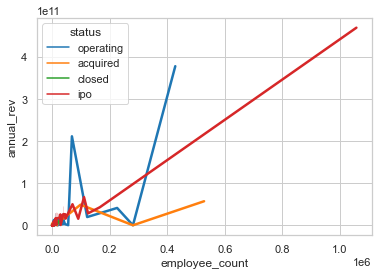

In [16]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=companiesCS_ann, x="employee_count", y="annual_rev", hue="status", palette="tab10", linewidth=2.5)

As seen above, there's seemingly a direct proportional relation between the number of employees and the annual revenue. It supports the fact of hiring intels is for the sake of the company's success, yet  it is seen that each company with different status can be slightly different. Let's analyze at each status seperately.

<AxesSubplot:xlabel='employee_count', ylabel='annual_rev'>

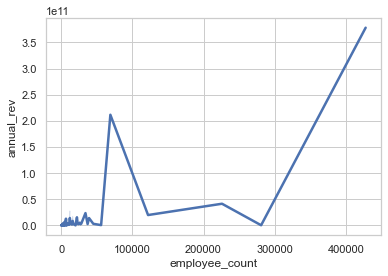

In [17]:
sns.lineplot(data=companiesCS_ann[companiesCS_ann['status'] == 'operating'], x="employee_count", y="annual_rev", palette="tab10", linewidth=2.5)

From the last grap it is seen that with the increase in the number of employees, the annual revenue increases with it. Looking at the graph there is what seems like a point where if it's reached, there is a clear direct relation between both attributes, meaning that companies may suffer in acheiving high profit until a certain point. In this sample, a few companies made profit with employees less than around 2700000 but once this number of employees is reached, it is almost garenteed of high profits.

<AxesSubplot:xlabel='employee_count', ylabel='annual_rev'>

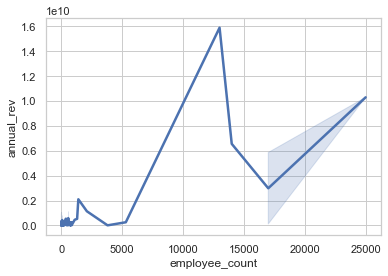

In [18]:
sns.lineplot(data=companiesCS_ann[companiesCS_ann['status'] == 'closed'], x="employee_count", y="annual_rev", palette="tab10", linewidth=2.5)

From the previous graph, a similar pattern is recognized from the previous graph. Here, the closed companies the maximum number of employees and annual revenue reached is noticebly way less than the operatiing companies which is reasonable. Having more than 5000 acheive reasonable profits.

<AxesSubplot:xlabel='employee_count', ylabel='annual_rev'>

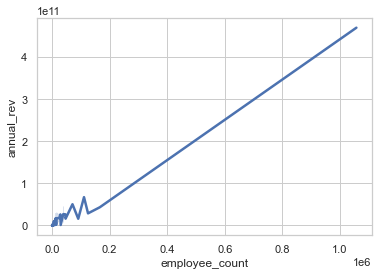

In [19]:
sns.lineplot(data=companiesCS_ann[companiesCS_ann['status'] == 'ipo'], x="employee_count", y="annual_rev", palette="tab10", linewidth=2.5)

Regarding the ipo companies, they can have a huge number of employees since they are publically offered for stock sharing, they may have the ability to hire great amount of employees, and from the pattern seen from past graphs, hiring more employees help in increasing annual revenues. By this graph, it is clearly seen that the number of employees is directly proportional with the number of employees.

<AxesSubplot:xlabel='employee_count', ylabel='annual_rev'>

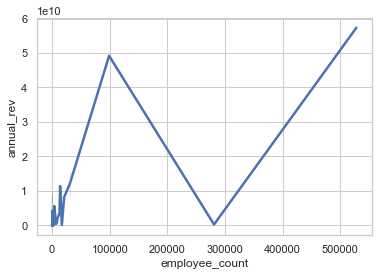

In [20]:
sns.lineplot(data=companiesCS_ann[companiesCS_ann['status'] == 'acquired'],x="employee_count", y="annual_rev", palette="tab10", linewidth=2.5)

Since those companies are aquired so having much employees should be acheivable due to the addtion of the old employees to the ones working in the aquired one. So, the increase of employees definetly helped in increasing the annual revenue of the company.

## Question 2: Which categroy acheives highest revenue? (Farah)

Let's take a look at which category attracts most funding

#### Cleaning

Now we will remove the missing valiues from the category list and employee count that is equal to zero bcause we will formulate a ratio and cannot be divided by 0.

In [21]:
rev_employee = companiesCS_ann[companiesCS_ann.employee_count != 0]
rev_employee.sort_values(by=['company_category_list', 'annual_rev'],ascending=False, inplace=True)
rev_employee = rev_employee[rev_employee.company_category_list != 'missing']
rev_employee

C:\Users\Farah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev
5507,/organization/betify,Betify,http://getbetify.com,iPhone|Mobile|Social Network Media|Software,250000.00,operating,GBR,London,1,2013-05-13 00:00:00.000000000,2013-12-21,2013-12-21,222 days 00:00:00,6,0,117000.0
5251,/organization/befunky,BeFunky,http://www.befunky.com,iPhone|Mobile|Photography|Photo Sharing,1650000.00,operating,USA,missing,3,2007-01-01 00:00:00.000000000,2007-01-01,2012-03-01,0 days 00:00:00,21,11,3400000.0
8055,/organization/canwenetwork,CanWeNetwork,http://www.canwenetwork.com,iPhone|Mobile|Networking,3000000.00,operating,USA,Austin,1,2011-11-01 00:00:00.000000000,2012-03-01,2012-03-01,121 days 00:00:00,50,7,1504000.0
1903,/organization/aixuedai,Aixuedai,http://www.aixuedai.com/,iPhone|Lifestyle|Online Shopping|Retail,40000000.00,operating,GBR,Rayleigh,1,2011-04-19 20:46:43.240577680,2015-01-12,2015-01-12,1363 days 03:13:16.759422320,320,0,65250000.0
4165,/organization/audanika,Audanika,http://www.audanika.com,iPad|iPhone|Mobile|Music,0.00,operating,DEU,Ilmenau,1,2010-01-01 00:00:00.000000000,2010-01-01,2010-01-01,0 days 00:00:00,4,2,672000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,/organization/astroprint,AstroPrint,https://www.astroprint.com,3D Printing,250000.00,operating,USA,San Diego,1,2013-09-01 00:00:00.000000000,2014-11-01,2014-11-01,426 days 00:00:00,5,23,5000000.0
9925,/organization/makerarm,Makerarm,http://makerarm.com,3D Printing,85000.00,operating,USA,missing,1,2015-01-01 00:00:00.000000000,2015-10-05,2015-10-05,277 days 00:00:00,5,7,637000.0
6540,/organization/blueprinter,BluePrinter,http://blueprinter.dk,3D Printing,0.00,operating,DNK,Copenhagen,2,2009-01-01 00:00:00.000000000,2013-03-01,2015-05-26,1520 days 00:00:00,8,8,555000.0
12983,/organization/my-mini-factory,My Mini Factory,http://www.myminifactory.com,3D Printing,1200000.00,operating,GBR,London,1,2013-06-18 00:00:00.000000000,2015-10-25,2015-10-25,859 days 00:00:00,44,21,409000.0


Calculating the revenue per employee is a meaningful analytical tool because it measures how efficiently a particular firm utilizes its employees. Ideally, a company wants the highest ratio of revenue per employee possible because a higher ratio indicates greater productivity. 

In [22]:
rev_employee['rev/employee'] = rev_employee['annual_rev']/rev_employee['employee_count']
rev_employee

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev,rev/employee
5507,/organization/betify,Betify,http://getbetify.com,iPhone|Mobile|Social Network Media|Software,250000.00,operating,GBR,London,1,2013-05-13 00:00:00.000000000,2013-12-21,2013-12-21,222 days 00:00:00,6,0,117000.0,19500.000000
5251,/organization/befunky,BeFunky,http://www.befunky.com,iPhone|Mobile|Photography|Photo Sharing,1650000.00,operating,USA,missing,3,2007-01-01 00:00:00.000000000,2007-01-01,2012-03-01,0 days 00:00:00,21,11,3400000.0,161904.761905
8055,/organization/canwenetwork,CanWeNetwork,http://www.canwenetwork.com,iPhone|Mobile|Networking,3000000.00,operating,USA,Austin,1,2011-11-01 00:00:00.000000000,2012-03-01,2012-03-01,121 days 00:00:00,50,7,1504000.0,30080.000000
1903,/organization/aixuedai,Aixuedai,http://www.aixuedai.com/,iPhone|Lifestyle|Online Shopping|Retail,40000000.00,operating,GBR,Rayleigh,1,2011-04-19 20:46:43.240577680,2015-01-12,2015-01-12,1363 days 03:13:16.759422320,320,0,65250000.0,203906.250000
4165,/organization/audanika,Audanika,http://www.audanika.com,iPad|iPhone|Mobile|Music,0.00,operating,DEU,Ilmenau,1,2010-01-01 00:00:00.000000000,2010-01-01,2010-01-01,0 days 00:00:00,4,2,672000.0,168000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,/organization/astroprint,AstroPrint,https://www.astroprint.com,3D Printing,250000.00,operating,USA,San Diego,1,2013-09-01 00:00:00.000000000,2014-11-01,2014-11-01,426 days 00:00:00,5,23,5000000.0,1000000.000000
9925,/organization/makerarm,Makerarm,http://makerarm.com,3D Printing,85000.00,operating,USA,missing,1,2015-01-01 00:00:00.000000000,2015-10-05,2015-10-05,277 days 00:00:00,5,7,637000.0,127400.000000
6540,/organization/blueprinter,BluePrinter,http://blueprinter.dk,3D Printing,0.00,operating,DNK,Copenhagen,2,2009-01-01 00:00:00.000000000,2013-03-01,2015-05-26,1520 days 00:00:00,8,8,555000.0,69375.000000
12983,/organization/my-mini-factory,My Mini Factory,http://www.myminifactory.com,3D Printing,1200000.00,operating,GBR,London,1,2013-06-18 00:00:00.000000000,2015-10-25,2015-10-25,859 days 00:00:00,44,21,409000.0,9295.454545


It is seen that companies working in software and tech in general has the most annual revenues. This shows that the makrket of this kind of feild is profitable and has higher 

In [23]:
tmpp = rev_employee[rev_employee['company_category_list'].str.contains("Software")]
tmpp

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev,rev/employee
5507,/organization/betify,Betify,http://getbetify.com,iPhone|Mobile|Social Network Media|Software,250000.0,operating,GBR,London,1,2013-05-13,2013-12-21,2013-12-21,222 days 00:00:00,6,0,117000.0,1.950000e+04
5248,/organization/beetv,BeeTV,http://bee.tv,iPad|Reviews and Recommendations|Social Televi...,9500000.0,closed,ITA,Milan,2,2007-08-01,2009-06-03,2011-05-17,672 days 00:00:00,4,3,5400000.0,1.350000e+06
2234,/organization/alluring-logic,Alluring Logic,http://alluringlogic.com,iPad|Mobile|Point of Sale|Retail|SaaS|Software...,0.0,closed,USA,New York,1,2009-08-22,2013-07-25,2013-07-25,1433 days 00:00:00,540,3,37426000.0,6.930741e+04
119,/organization/21vianet,21viaNet,http://www.ch.21vianet.com,Software|Web Hosting,396000000.0,ipo,CHN,Beijing,5,2009-10-16,2008-02-13,2014-12-04,-611 days +00:00:00,630,9,797666000.0,1.266137e+06
14264,/organization/nexaweb-technologies,Nexaweb Inc.,http://www.nexaweb.com,Software|Web Development,14603757.0,operating,USA,Burlington,3,2000-01-01,2003-05-19,2012-08-21,1234 days 00:00:00,15,10,18906000.0,1.260400e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,/organization/4tiitoo,4tiitoo GmbH,http://www.4tiitoo.com,3D Technology|Augmented Reality|Computers|Comp...,0.0,operating,DEU,Munich,3,2013-12-10,2011-11-15,2014-08-18,-756 days +00:00:00,12,10,161000.0,1.341667e+04
1796,/organization/aio-robotics,AIO Robotics,http://www.aiorobotics.com,3D Printing|Hardware + Software,0.0,operating,USA,Los Angeles,1,2013-05-24,2015-07-01,2015-07-01,768 days 00:00:00,3,5,10000000.0,3.333333e+06
9003,/organization/local-motors,Local Motors,http://localmotors.com,3D Printing|Crowdfunding|Crowdsourcing|Educati...,250000.0,operating,USA,Chandler,2,2007-07-01,2012-06-06,2014-07-01,1802 days 00:00:00,380,29,32000000.0,8.421053e+04
9616,/organization/lyteshot,LyteShot,http://www.lyteshot.com,3D Printing|Advertising|Augmented Reality|Digi...,635000.0,operating,USA,Chicago,1,2012-12-26,2014-11-14,2014-11-14,688 days 00:00:00,75,3,3985000.0,5.313333e+04


### Question 3: Does the annual Revenue attract investors? (Farah)

Let's first look at the investments and see if number of investors affect those proifts or not

#### Merging

First, we merge between the two datasets

In [24]:
comps_invests = companiesCS_ann.join(investsC[['raised_amount_usd', 'investor_name']])
comps_invests

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,number_of_technologies,annual_rev,raised_amount_usd,investor_name
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,2015-01-05,2015-01-05,1363 days 03:13:16.759422320,57,1,1.500000e+06,2.000000e+06,DT Capital Partners
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.000000e+00,operating,USA,Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665 days 00:00:00,67,10,5.000000e+06,3.000000e+06,Nexus Venture Partners
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,7.628510e+05,operating,CAN,Vancouver,2,1997-01-01 00:00:00.000000000,2009-09-11,2009-12-21,4636 days 00:00:00,30,6,8.575000e+06,1.700000e+06,Nexus Venture Partners
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,3.360000e+07,operating,USA,Mountain View,4,2011-01-01 00:00:00.000000000,2013-01-03,2015-11-09,733 days 00:00:00,370,32,3.210000e+07,8.900000e+06,Nexus Venture Partners
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1.150050e+06,operating,USA,San Francisco,3,2011-08-01 00:00:00.000000000,2011-07-20,2014-02-05,-12 days +00:00:00,3,3,2.200000e+07,2.000000e+07,Paxion Capital Partners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,/organization/pinstripe,Pinstripe,http://www.pinstripetalent.com,Consulting,3.000000e+06,operating,USA,Brookfield,2,2002-03-21 20:46:43.240577680,2005-12-14,2012-08-02,1363 days 03:13:16.759422320,60,17,1.676400e+07,1.493930e+07,Highland Capital Partners
16509,/organization/pint-please,Pint Please,http://www.pintplease.com,Android|Craft Beer|iOS|Mobile,4.546730e+05,operating,FIN,Oulu,1,2014-01-10 00:00:00.000000000,2014-08-13,2014-08-13,215 days 00:00:00,10,8,2.932000e+06,1.493930e+07,Revel Partners
16511,/organization/pintail-technologies,Pintail Technologies,http://www.pintailtechnologies.com,Software,1.000000e+07,operating,USA,Richardson,2,2000-01-01 00:00:00.000000000,2005-03-08,2006-09-29,1893 days 00:00:00,0,1,2.000000e+06,1.493930e+07,SV Angel
16512,/organization/pinterest,Pinterest,https://pinterest.com,Curated Web|Social Bookmarking|Social Media,1.315500e+09,operating,USA,San Francisco,10,2009-01-01 00:00:00.000000000,2010-01-01,2015-06-01,365 days 00:00:00,6000,26,2.436989e+09,1.493930e+07,Ann Arbor SPARK


We might notice that there is a possiblity of a direct proportional relationship between the amount of money invested in a company and its annual revenue. We will test it by visualizing the relationship.

#### Visualization & Analysis

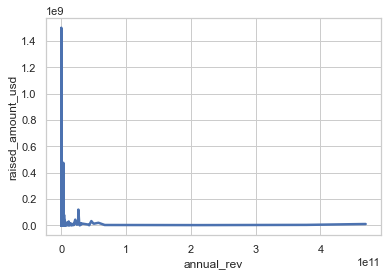

In [26]:
ax = sns.lineplot(data=comps_invests,x="annual_rev", y="raised_amount_usd", palette="tab10", linewidth=2.5)



The barplot disproves the hypothesis that the annual revenue may attract investors to invest more money into those companies. As seen the relationship between the annual revenue and investing amount isn't directly proportional.

# Hypothsis using T Test

Using T test, we will test if the effect of the number of employees and the effect of the number of technologies used on the company's success are equal

H0: The effect of the number of employees and the effect of the number of technologies used on the company's success are equal i.e., μ1 = μ2

H1: The effect of the number of employees and the effect of the number of technologies used on the company's success are not equal i.e., μ1 ≠ μ2

creating series for each column in the original dataframe

first we will take a sample of 51 rows from the dataset

In [49]:
import scipy
sample = companiesCS.head(51)
emp = sample['employee_count']
tech = sample['number_of_technologies']

Calculating the t score

In [50]:
t_score = scipy.stats.ttest_ind(tech, emp).statistic
t_score

-1.747505269912122

A negative t-value indicates a reversal in the directionality of the effect, which has no bearing on the significance of the difference between groups, so we take its absolute value

Calculating the degree of freedom

In [51]:
Degree_of_freedom = len(tech) + len(emp) - 2
Degree_of_freedom

100

In [52]:
alpha = 0.05
scipy.stats.t.ppf(1-alpha, Degree_of_freedom)

1.66023432606575

As seen above the absolute value of the t-score is > the t-value from the table so the null hypothesis is rejected

therefore, The effect of the number of employees and the effect of the number of technologies used on the company's success are not equal